In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Install fiona
!pip install fiona

#import fiona
import fiona  

### input file 
input_file=("/content/drive/MyDrive/Geomática/Incidentes/shapefile/Incidentes_georreferenciados_2019.shp")

#load file 
inc_geo=fiona.open(input_file,"r")

In [10]:
#Shema
print(inc_geo.schema)

#imprimir un elemento 

print(inc_geo[4])



{'properties': OrderedDict([('OBJECTID', 'int:6'), ('RADICADO', 'str:7'), ('FECHA', 'date'), ('DIA', 'str:2'), ('PERIODO', 'str:4'), ('CLASE', 'str:14'), ('DIRECCION', 'str:26'), ('DIRECCION_', 'str:29'), ('CBML', 'str:11'), ('TIPO_GEOCO', 'str:34'), ('GRAVEDAD', 'str:11'), ('BARRIO', 'str:40'), ('COMUNA', 'str:43'), ('DISENO', 'str:13'), ('DIA_NOMBRE', 'str:10'), ('MES', 'str:2'), ('MES_NOMBRE', 'str:10'), ('X_MAGNAMED', 'float:24.15'), ('Y_MAGNAMED', 'float:24.15'), ('LONGITUD', 'float:24.15'), ('LATITUD', 'float:24.15'), ('SHAPE', 'str:1')]), 'geometry': 'Point'}
{'type': 'Feature', 'id': '4', 'properties': OrderedDict([('OBJECTID', 708816), ('RADICADO', '1668074'), ('FECHA', '2019-04-18'), ('DIA', '18'), ('PERIODO', '2019'), ('CLASE', 'Choque'), ('DIRECCION', 'CR 43 A CL 19'), ('DIRECCION_', 'CR  043 A   019  000 00000'), ('CBML', '1404'), ('TIPO_GEOCO', 'Malla vial'), ('GRAVEDAD', 'HERIDO'), ('BARRIO', 'Castropol'), ('COMUNA', 'El Poblado'), ('DISENO', 'Tramo de via'), ('DIA_NOMBR

OrderedDict([('OBJECTID', 'int:6'),
             ('RADICADO', 'str:7'),
             ('FECHA', 'date'),
             ('DIA', 'str:2'),
             ('PERIODO', 'str:4'),
             ('CLASE', 'str:14'),
             ('DIRECCION', 'str:26'),
             ('DIRECCION_', 'str:29'),
             ('CBML', 'str:11'),
             ('TIPO_GEOCO', 'str:34'),
             ('GRAVEDAD', 'str:11'),
             ('BARRIO', 'str:40'),
             ('COMUNA', 'str:43'),
             ('DISENO', 'str:13'),
             ('DIA_NOMBRE', 'str:10'),
             ('MES', 'str:2'),
             ('MES_NOMBRE', 'str:10'),
             ('X_MAGNAMED', 'float:24.15'),
             ('Y_MAGNAMED', 'float:24.15'),
             ('LONGITUD', 'float:24.15'),
             ('LATITUD', 'float:24.15'),
             ('SHAPE', 'str:1')])

In [11]:
#imprimir propiedades 

inc_geo.schema["properties"]


OrderedDict([('OBJECTID', 'int:6'),
             ('RADICADO', 'str:7'),
             ('FECHA', 'date'),
             ('DIA', 'str:2'),
             ('PERIODO', 'str:4'),
             ('CLASE', 'str:14'),
             ('DIRECCION', 'str:26'),
             ('DIRECCION_', 'str:29'),
             ('CBML', 'str:11'),
             ('TIPO_GEOCO', 'str:34'),
             ('GRAVEDAD', 'str:11'),
             ('BARRIO', 'str:40'),
             ('COMUNA', 'str:43'),
             ('DISENO', 'str:13'),
             ('DIA_NOMBRE', 'str:10'),
             ('MES', 'str:2'),
             ('MES_NOMBRE', 'str:10'),
             ('X_MAGNAMED', 'float:24.15'),
             ('Y_MAGNAMED', 'float:24.15'),
             ('LONGITUD', 'float:24.15'),
             ('LATITUD', 'float:24.15'),
             ('SHAPE', 'str:1')])

In [ ]:
type(get_coordinates(inc_geo,"LONGITUD"))

NoneType

In [1]:
#importar pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#instalar geopandas
!pip install geopandas

#importar geopandas
import geopandas as gpd

#instalar contextily
!pip install contextily
import contextily as ctx

#instalar folium
!pip install folium
import folium



     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 19.3 MB 29 kB/s 


In [3]:
#importar dataset 
df_ac=pd.read_csv("/content/drive/MyDrive/Geomática/Incidentes/Incidentes_georreferenciados_2019.csv")

#agrupar numero de accidentes por comuna
df=df_ac.groupby("COMUNA").size().reset_index().rename(columns={0:"NUMERO DE ACCIDENTES"})

#cargar poligonos de
shp_CV=gpd.read_file('/content/drive/MyDrive/Geomática/Datos/L%C3%ADmite_Catastral_de__Comunas_y_Corregimientos.shp')
shp_CV["NOMBRE"]
df

,COMUNA,NUMERO DE ACCIDENTES
0,Aranjuez,2550
1,Belén,2675
2,Buenos Aires,1763
3,Castilla,4151
4,Corregimiento de Altavista,82
5,Corregimiento de San Antonio de Prado,678
6,Corregimiento de San Cristóbal,413
7,Corregimiento de San Sebastián de Palmitas,2
8,Corregimiento de Santa Elena,145
9,Doce de Octubre,1071


# Mapa de calor accidentes por comuna


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  from ipykernel import kernelapp as app


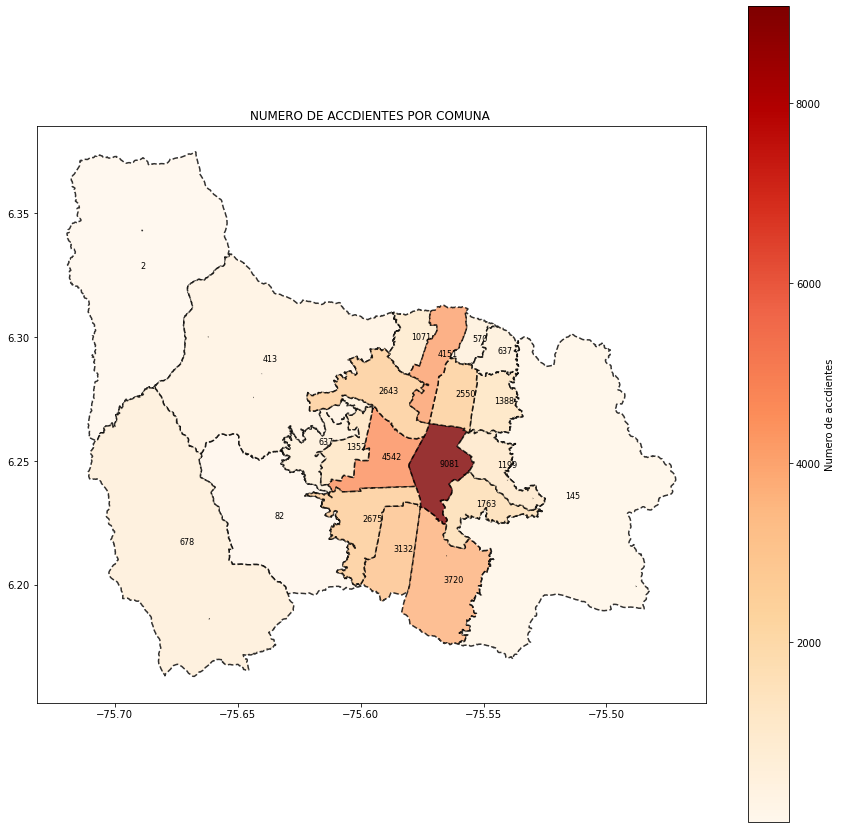

In [86]:
#renombrar 

df['NOMBRE']=df["COMUNA"].str.upper()
df['NOMBRE'].replace({"CORREGIMIENTO DE ALTAVISTA":"ALTAVISTA","CORREGIMIENTO DE SAN ANTONIO DE PRADO":"SAN ANTONIO DE PRADO","CORREGIMIENTO DE SAN CRISTÓBAL":"SAN CRISTOBAL","CORREGIMIENTO DE SAN SEBASTIÁN DE PALMITAS":"PALMITAS", 
                      "CORREGIMIENTO DE SANTA ELENA":"SANTA ELENA","BELÉN":"BELEN","LA AMÉRICA":"LA AMERICA","LAURELES ESTADIO":"LAURELES" },inplace= True)

#unir las tablas 
shp_cv_ac = shp_CV.merge(df, on='NOMBRE')     
ax=shp_cv_ac.plot(column="NUMERO DE ACCIDENTES", legend=True, figsize=(15, 15), edgecolor='k',cmap="OrRd",alpha=0.8,lw=1.5,linestyle="--",
            legend_kwds={'label': "Numero de accdientes",
                         })  
ax.set_title("NUMERO DE ACCDIENTES POR COMUNA ")

#obtener centroides para colocar nombres de los corregimientos y veredas
shp_cv_ac["center"] = shp_cv_ac["geometry"].centroid
shp_cv_ac_points = shp_cv_ac.copy()
shp_cv_ac_points.set_geometry("center", inplace = True)

#extraer textos de los nombres de cada unidad
texts = []
for x, y, label in zip(shp_cv_ac_points.geometry.x, shp_cv_ac_points.geometry.y, shp_cv_ac_points["NUMERO DE ACCIDENTES"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

# Gráfico de línea accidenes por mes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Saw kwargs ['mew', 'markeredgewidth'] which are all aliases for 'markeredgewidth'.  Kept value from 'markeredgewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  after removing the cwd from sys.path.


Text(0, 0.5, 'NUMERO DE ACCIDENTES')

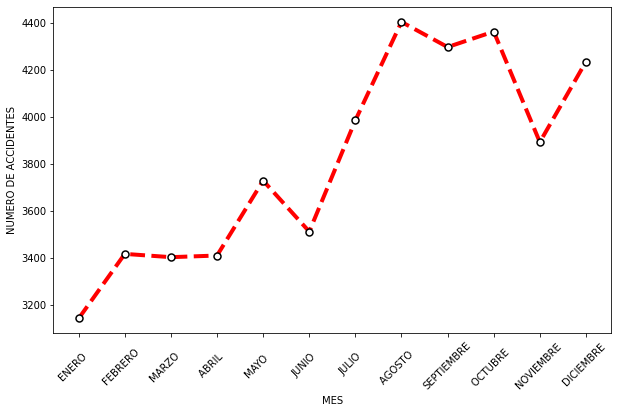

In [34]:
#agrupar por mes
df_ac_mes=df_ac.groupby(["MES","MES_NOMBRE"]).size().reset_index().rename(columns={0:"NUMERO_DE_ACCIDENTES"})

#lineplot the de sinienstros por mes 
plt.figure(figsize=(10,6))
plt.plot(df_ac_mes["MES_NOMBRE"],df_ac_mes["NUMERO_DE_ACCIDENTES"],color="r",marker="o",
         markeredgecolor="k",markerfacecolor="w",markeredgewidth=1.5,linestyle="--",lw=4,ms=7,mew=10)

plt.xlabel("MES")
plt.xticks(rotation=45)
plt.ylabel("NUMERO DE ACCIDENTES")
